In [2]:
library(zoo)
library(forecast)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



Fill in missing values.

In [3]:
preprocessing <- function(ts_csv, total_csv){
    
    # removes rows with low observations and locfs them
    # returns time series and total time series, as a list
    
    ts = read.csv(ts_csv)
    total <- read.csv(total_csv)
    df = data.frame(ts)
    df_total = data.frame(total)
    
    missing = df_total[,'total']<5000
    df_total[missing, 'total'] <- NA
    df[missing,] <-NA
    ts_total = ts(na.locf(df_total[,'total']))
    ts_filled = ts(na.locf(df[, ncol(df)]))
    return(list(series=ts_filled, total=ts_total))
}

In [4]:
cas = ts(preprocessing('E:/summary/sept_casual.csv', 'E:/summary/sept_total.csv')$series, frequency=24)

Starting time series. We don't need to worry about stationarity.

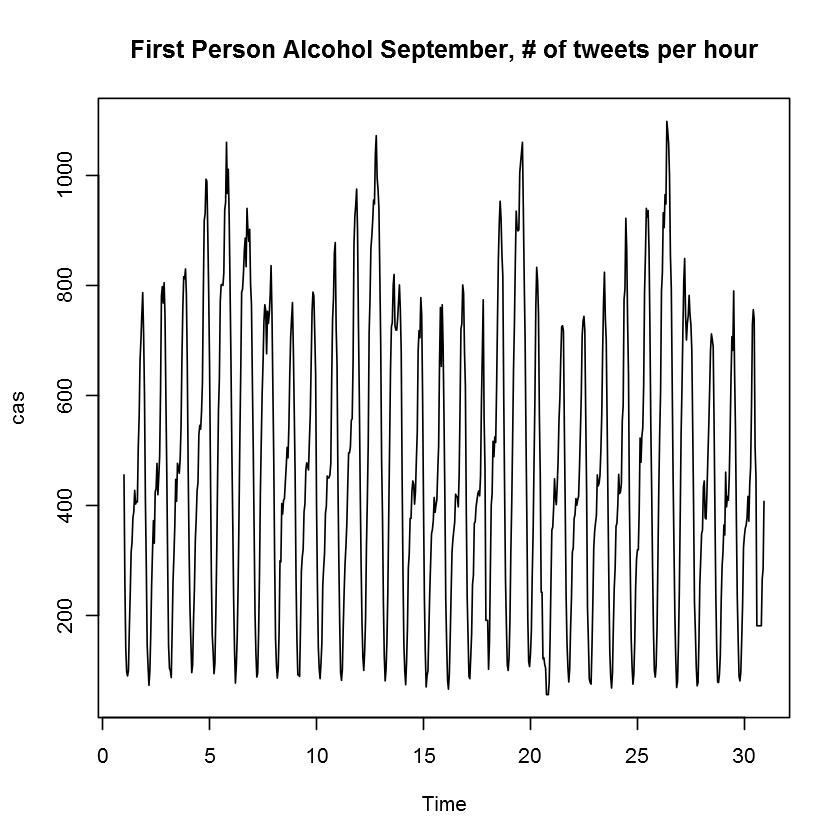

In [57]:
plot(cas, main = 'First Person Alcohol September, # of tweets per hour')

In [48]:
install.packages('Rwave', repos="http://cran.rstudio.com/")

Installing package into 'C:/Users/Tom Work/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'Rwave' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tom Work\AppData\Local\Temp\RtmpqIDT5d\downloaded_packages


In [7]:
install.packages('wavelets', repos="http://cran.rstudio.com/")

Installing package into 'C:/Users/Tom Work/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'wavelets' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tom Work\AppData\Local\Temp\RtmpqIDT5d\downloaded_packages


In [8]:
library('wavelets')


Attaching package: 'wavelets'

The following object is masked from 'package:timeDate':

    align



Mother wavelet we are using (default = Least Asymetric 8). The choice is not very impactful on results.

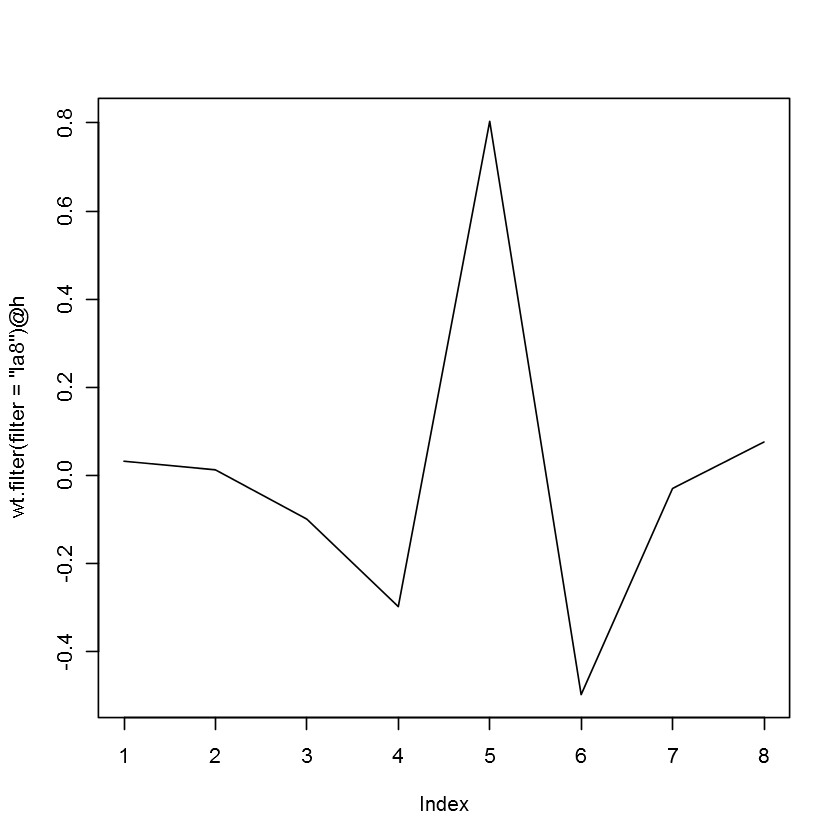

In [63]:
plot(wt.filter(filter='la8')@h, type='l')

Discrete Wavelet Transform (Time Discrete)

See: https://cran.r-project.org/web/packages/wavelets/wavelets.pdf

In [14]:
res = dwt(cas, filter='la8')

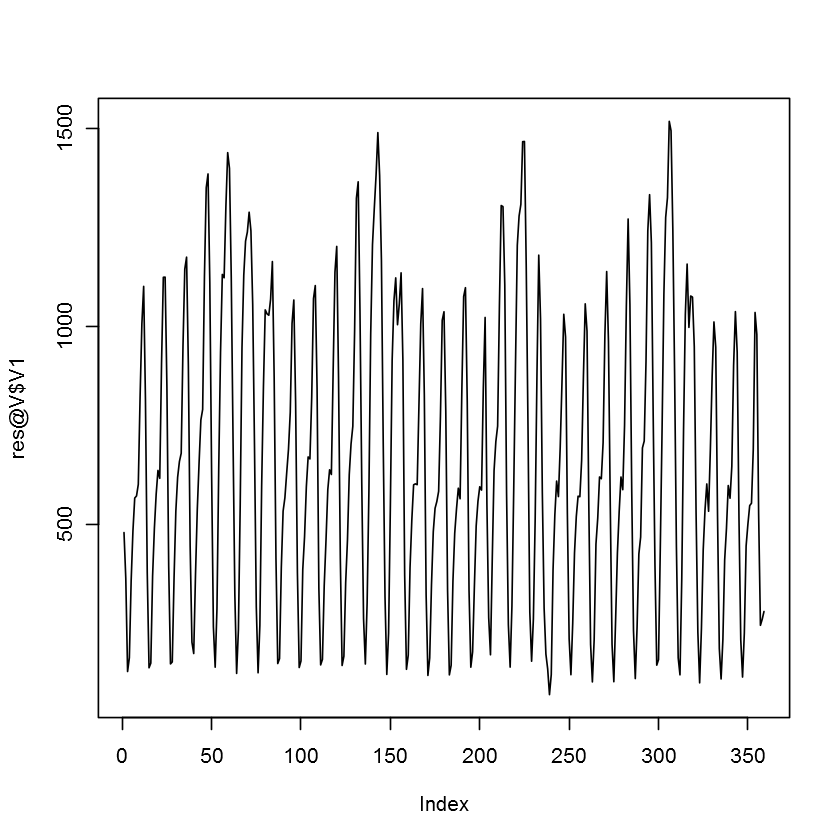

In [71]:
plot(res@V$V1, type='l')

Level 1: High pass filter output (Freq 360-720)

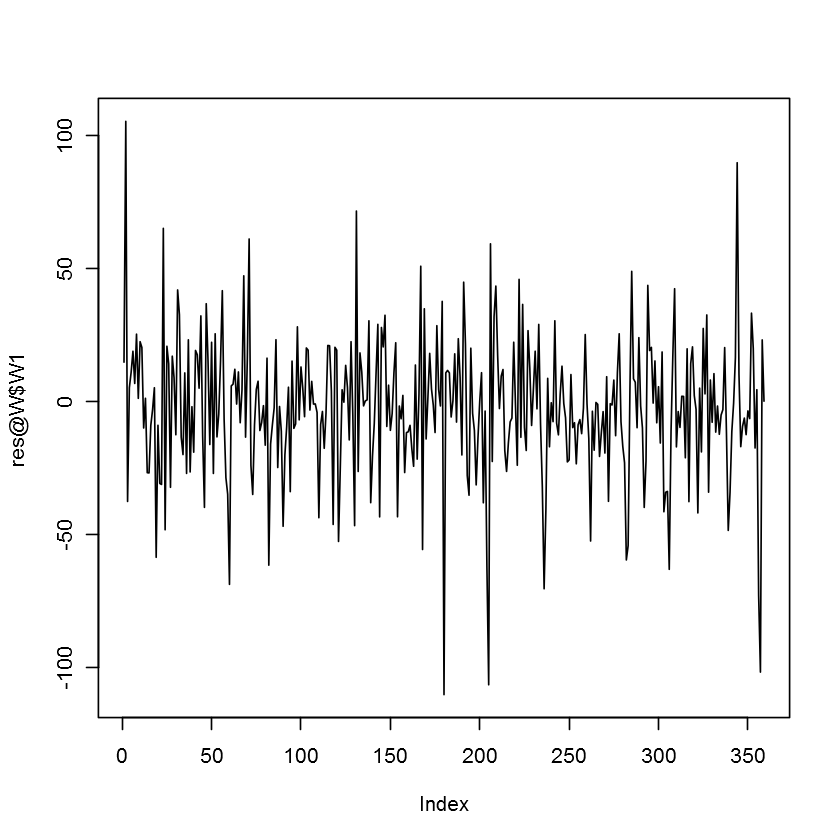

In [30]:
plot(res@W$W1, type='l')

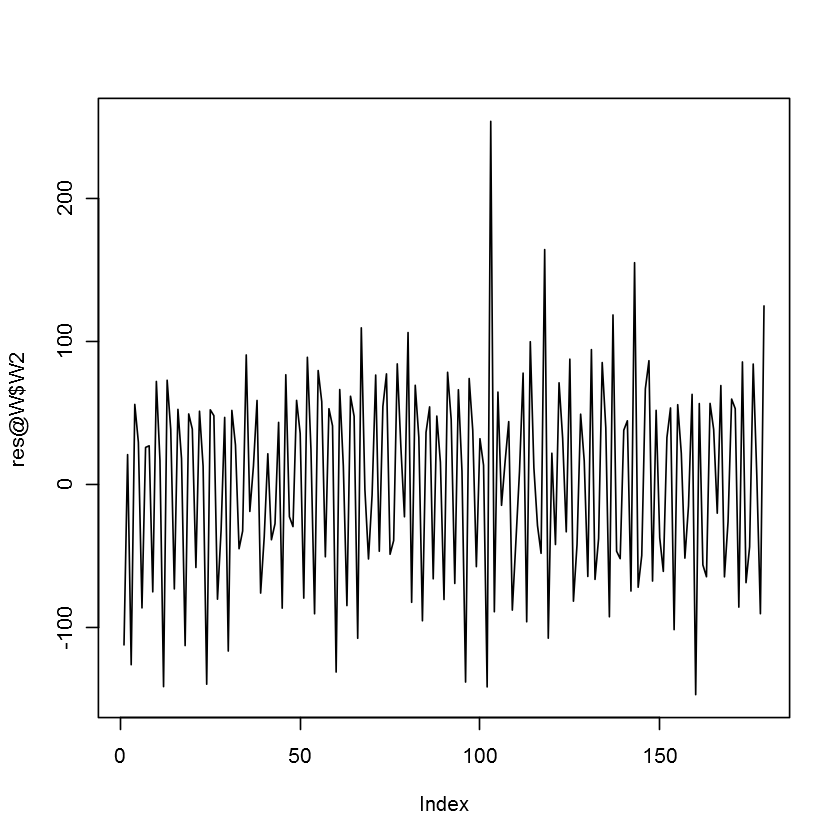

In [31]:
plot(res@W$W2, type='l')

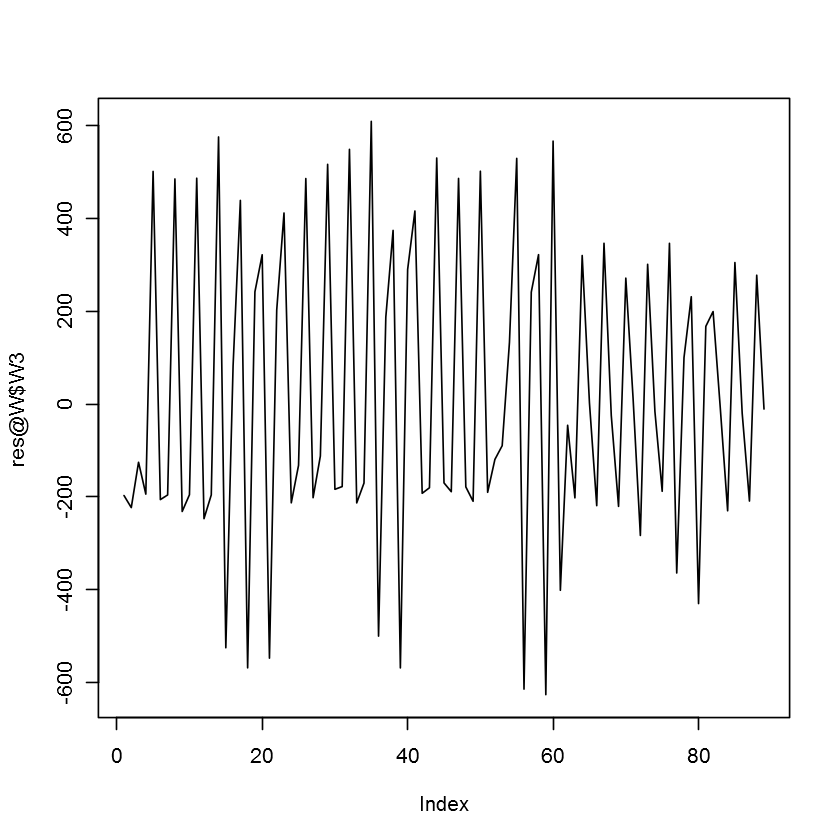

In [32]:
plot(res@W$W3, type='l')

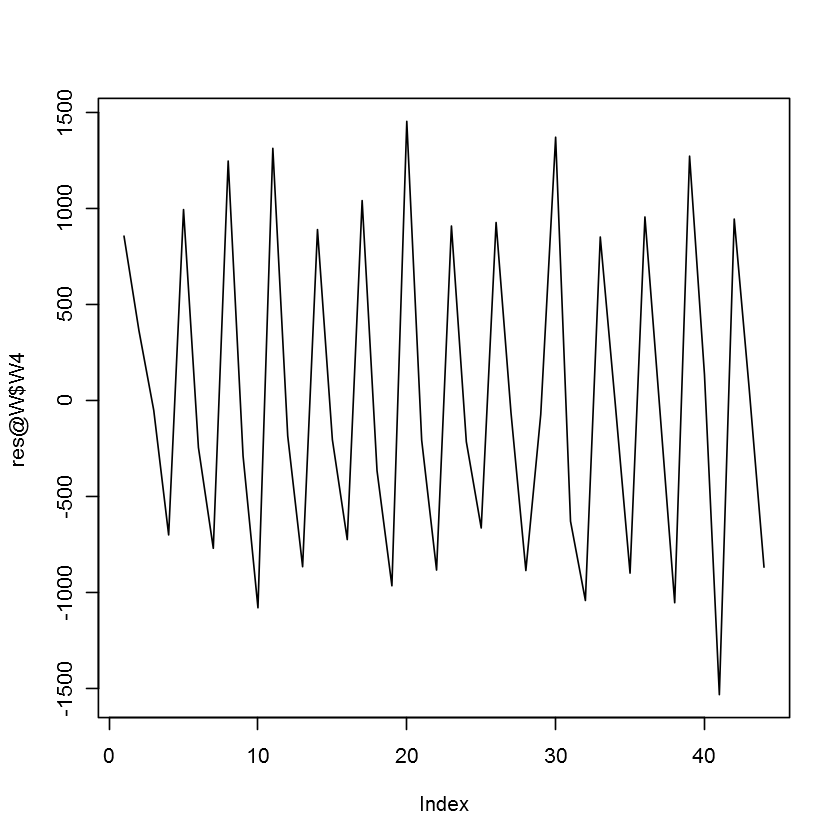

In [33]:
plot(res@W$W4, type='l')

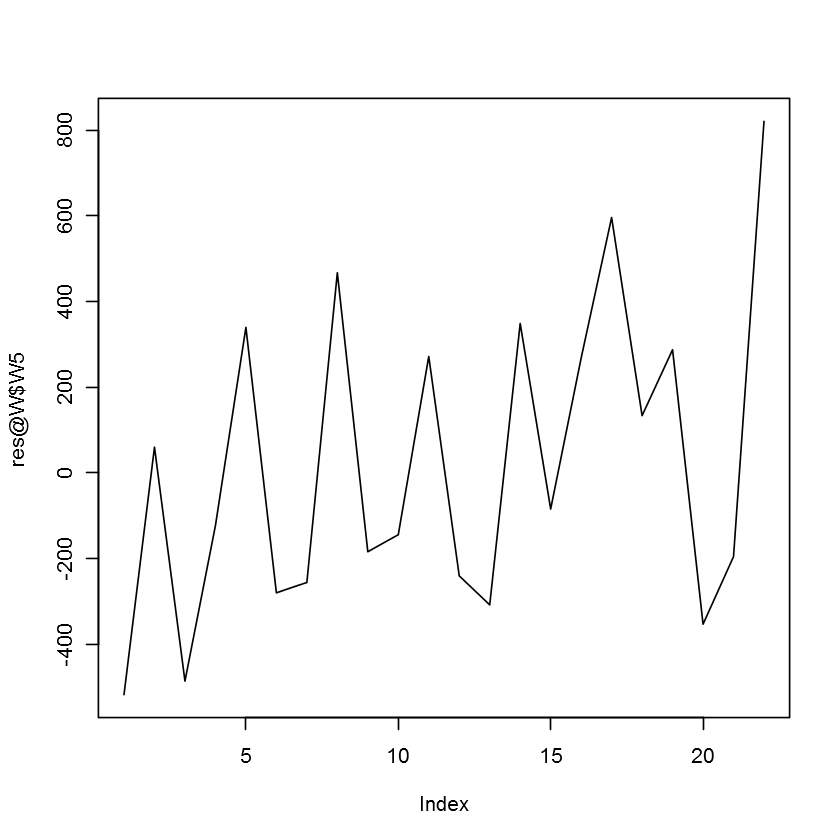

In [34]:
plot(res@W$W5, type='l')

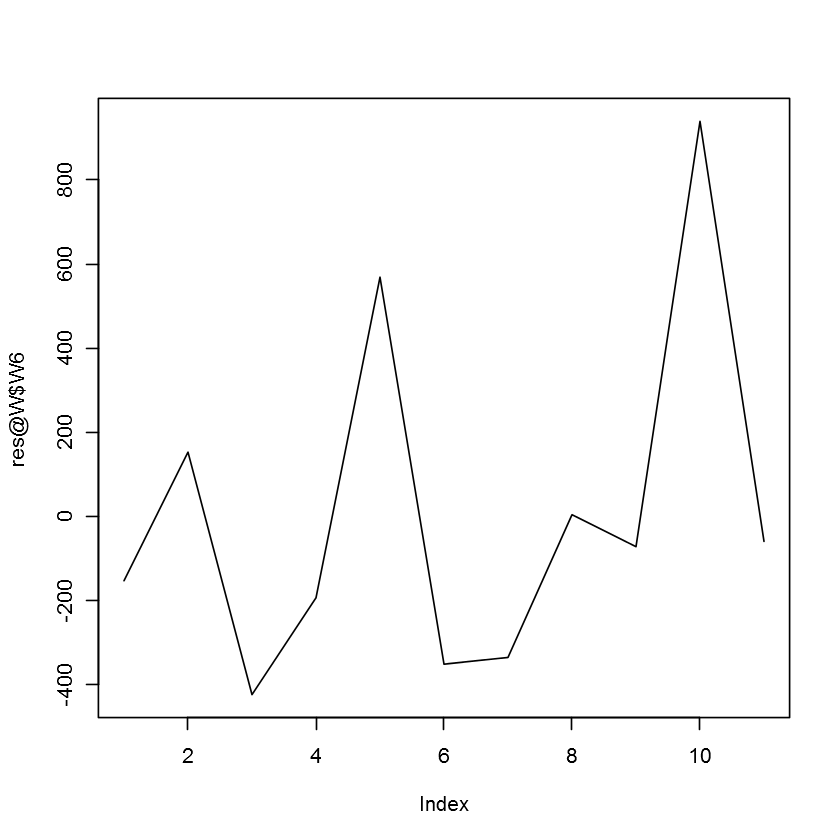

In [35]:
plot(res@W$W6, type='l')

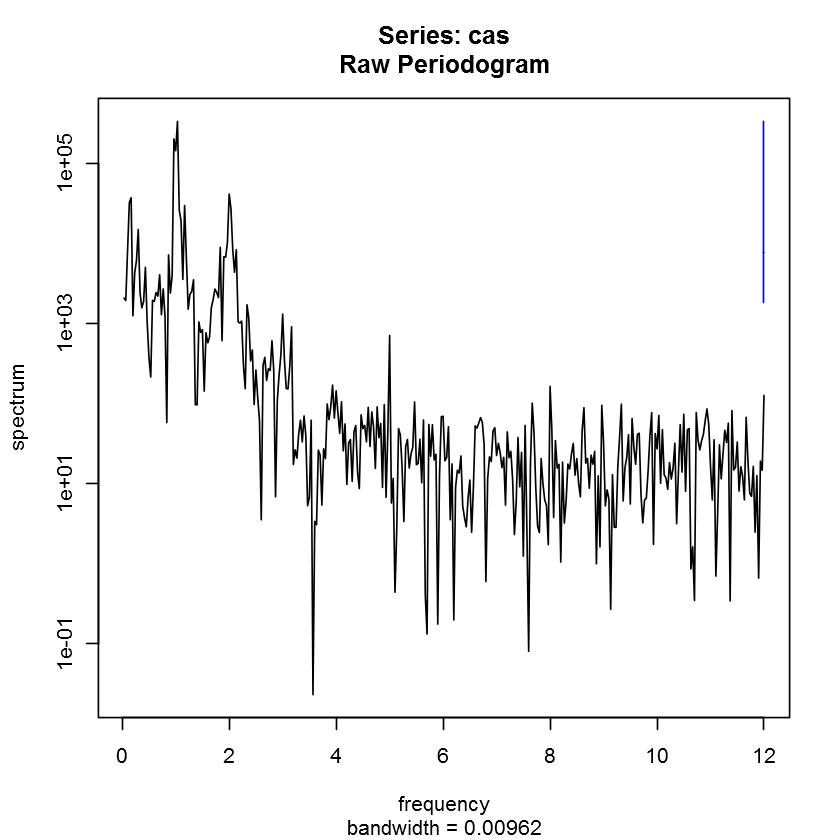

In [47]:
spec.pgram(cas)

In [49]:
library(Rwave)

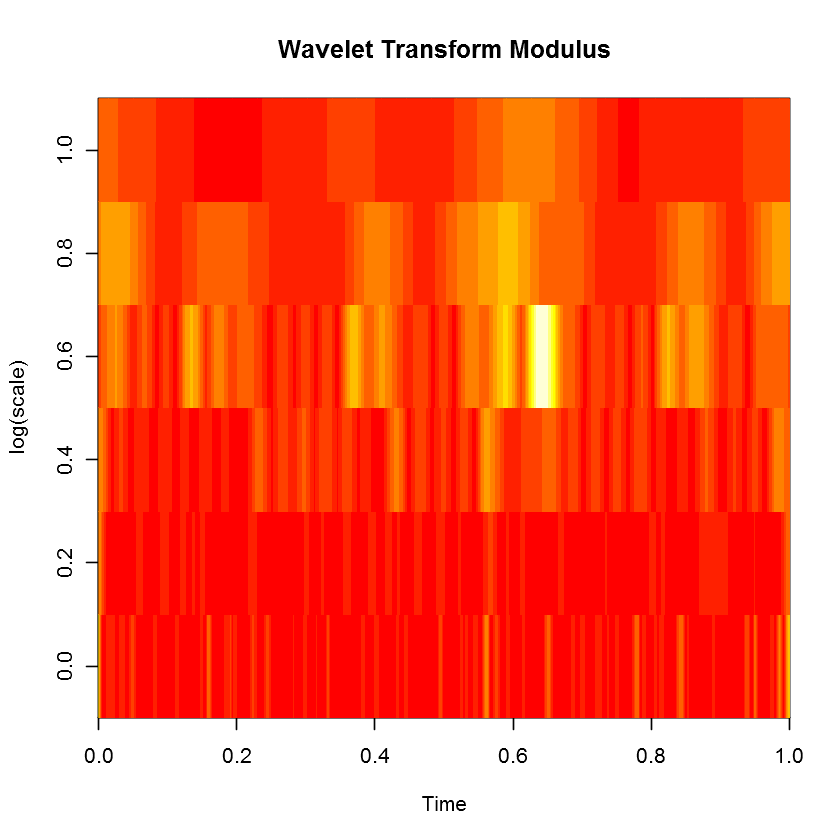

In [52]:
cont = cwt(cas, 6)

In [54]:
cont

5.80138683644497e+01-3e-13i,35.9070260457355-18.9298927275587i,31.7165457316483-17.3972099607976i,11.2567535302861-17.694451696817i,-34.9175007999957-19.1886056950749i,-9.1314184503873-24.4733556324125i
-4.5908406728443e+01+3e-13i,18.6089611137145+33.8898828027893i,35.2729801687197+9.4699594098047i,17.6897854603954-13.4313988278035i,-30.9848581978408-26.2096770995863i,-6.7887434914161-25.2253871946637i
2.81758985450779e+01-3e-13i,-30.0583889530371+16.9591440342936i,18.9218003756242+30.9803504931607i,22.4999027339896-6.814140701235i,-25.6006892687851-32.4011901982908i,-4.3851861077086-25.7467389152822i
-1.44334083883054e+01+2e-13i,-14.2541571486594-25.1432382944474i,-7.3093464605789+34.7470886738809i,24.8129192366534+1.5408207816044i,-18.9445200564635-37.4553220883278i,-1.9440469309591-26.0326825515027i
7.96047240812435e+00-1.1e-13i,19.9748837983492-10.964132326209i,-27.9297427228535+19.6604274560089i,23.9868178985273+10.683695116288i,-11.262699231496-41.1040075111217i,0.5110392204746-26.0808983859833i
-6.49890854672087e+00+7e-14i,7.6281146443058+15.2672591604439i,-32.0106094291659-4.1854410866336i,19.7442589545087+19.4177199172313i,-2.8594062745602-43.1337592470246i,2.9563575989574-25.8914935132202i
6.92940774048005e+00-5e-14i,-11.4731715268736+4.7186327985337i,-19.4230119530117-22.7938917993525i,12.2733645292033+26.4413101363778i,5.9156925940825-43.3984150158219i,5.368367860915-25.4669927630717i
-7.67122786442189e+00+3e-14i,-2.54623462827806-8.74584769453664i,0.5145882511917-27.2159316221429i,2.2715904857238+30.5343534184976i,14.6826538661396-41.8290388549021i,7.7239554788392-24.8123024666015i
8.30653686388614e+00-4e-14i,6.99159292349264-1.22882322697163i,16.1348369386873-18.0272346097915i,-9.0880192778447+30.7648178548231i,23.0486639580613-38.4403212295349i,10.0006772819592-23.9346476031468i
-8.77090451460489e+00+2e-14i,0.71963512452375+5.96789265237812i,20.737477035207-3.0843096913245i,-20.2782405150816+26.6816116538527i,30.6268240410939-33.3329813677105i,12.176998260572-22.8434831930199i
9.12722196429574e+00-7e-15i,-5.38058082361926+0.86612710034413i,15.3201052644057+8.7705159138155i,-29.6209254296039+18.4545734609516i,37.0553783922364-26.6918705494336i,14.2325168904483-21.5503811132683i


In [55]:
cwtpolar(cont)

ERROR: Error in array(0, c(sigsize, noctave, nvoice)): negative length vectors are not allowed
